In [964]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.utils import resample 

In [966]:
df = pd.read_csv("framingham.csv")
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,-,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,NaN,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,-245.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [968]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [970]:
df.shape

(4240, 16)

In [972]:
df.info

<bound method DataFrame.info of       male  age  education currentSmoker  cigsPerDay BPMeds  prevalentStroke  \
0        1   39        4.0             -         0.0      0                0   
1        0   46        2.0             0         0.0      0                0   
2        1   48        1.0             1        20.0      0                0   
3        0   61        3.0             1        30.0      0                0   
4        0   46        3.0             1        23.0      0                0   
...    ...  ...        ...           ...         ...    ...              ...   
4235     0   48        2.0             1        20.0    NaN                0   
4236     0   44        1.0             1        15.0      0                0   
4237     0   52        2.0             0         0.0      0                0   
4238     1   40        3.0             0         0.0      0                0   
4239     0   39        3.0             1        30.0      0                0   

      p

In [974]:
# 1- Check for incorrect data types


In [976]:
df['currentSmoker'] = df.currentSmoker.replace('-', np.nan)
df['currentSmoker'] = pd.to_numeric(df['currentSmoker'])


In [978]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,NaN,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1.0,20.0,0,0,0,0,245.0,NaN,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1.0,30.0,0,0,1,0,-245.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1.0,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [980]:
df.dtypes


male                 int64
age                  int64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds              object
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [982]:
#2- Checking and Fixing spelling error in column names

In [984]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [986]:
df.rename(columns={"totChol" : "totalChol"}, inplace=True)

In [988]:
#3.  Checking and fixing spelling errors in categorical column

In [990]:
object_cols = df.select_dtypes(include='object').columns

In [992]:
object_cols

Index(['BPMeds'], dtype='object')

In [994]:
for col in object_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for BPMeds:
BPMeds
0    4062
1     124
-       1
Name: count, dtype: int64



In [996]:
df['BPMeds']= df['BPMeds'].replace({'-':'None'})

In [998]:
for col in object_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for BPMeds:
BPMeds
0       4062
1        124
None       1
Name: count, dtype: int64



In [1000]:
#4- Checking for negative values


In [1002]:
df.describe

<bound method NDFrame.describe of       male  age  education  currentSmoker  cigsPerDay BPMeds  prevalentStroke  \
0        1   39        4.0            NaN         0.0      0                0   
1        0   46        2.0            0.0         0.0      0                0   
2        1   48        1.0            1.0        20.0      0                0   
3        0   61        3.0            1.0        30.0      0                0   
4        0   46        3.0            1.0        23.0      0                0   
...    ...  ...        ...            ...         ...    ...              ...   
4235     0   48        2.0            1.0        20.0    NaN                0   
4236     0   44        1.0            1.0        15.0      0                0   
4237     0   52        2.0            0.0         0.0      0                0   
4238     1   40        3.0            0.0         0.0      0                0   
4239     0   39        3.0            1.0        30.0      0               

In [1004]:
df['totalChol'] = df['totalChol'].apply(lambda x:abs(x) if x<0 else x)

In [1006]:
df.totalChol.describe()

count    4190.000000
mean      236.704296
std        44.591102
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totalChol, dtype: float64

In [1008]:
#5- Checking for missing values and duplicate values



In [1010]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        1
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totalChol           50
sysBP                1
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [1012]:
df.isna().sum().sum()

647

In [1014]:
numerical_cols = ['education', 'currentSmoker', 'cigsPerDay', 'totalChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [1016]:
categorical_cols = ['BPMeds']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [1018]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totalChol          0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [1020]:
print(type(numerical_cols))
print(numerical_cols)


<class 'list'>
['education', 'currentSmoker', 'cigsPerDay', 'totalChol', 'sysBP', 'BMI', 'heartRate', 'glucose']


In [1022]:
if isinstance(df, pd.DataFrame):
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    print("Numerical columns:", numerical_cols)
else:
    print("Error: df is not a DataFrame")

Numerical columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totalChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [1024]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)


Numerical columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totalChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [1026]:
from sklearn.impute import KNNImputer

imputer= KNNImputer(n_neighbors=3) # error rate vs k values
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [1028]:
duplicate_count = df.duplicated().sum()  # ✔️ Stores the duplicate count separately
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [1030]:
#6- Checking for the outliers and fixing it


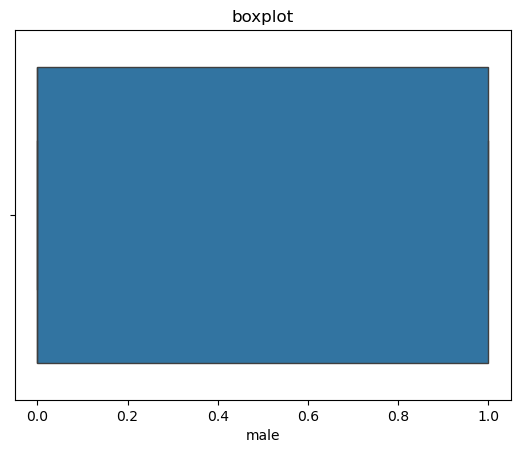

In [1032]:
sns.boxplot(data=df, x='male')
plt.title("boxplot")
plt.show()

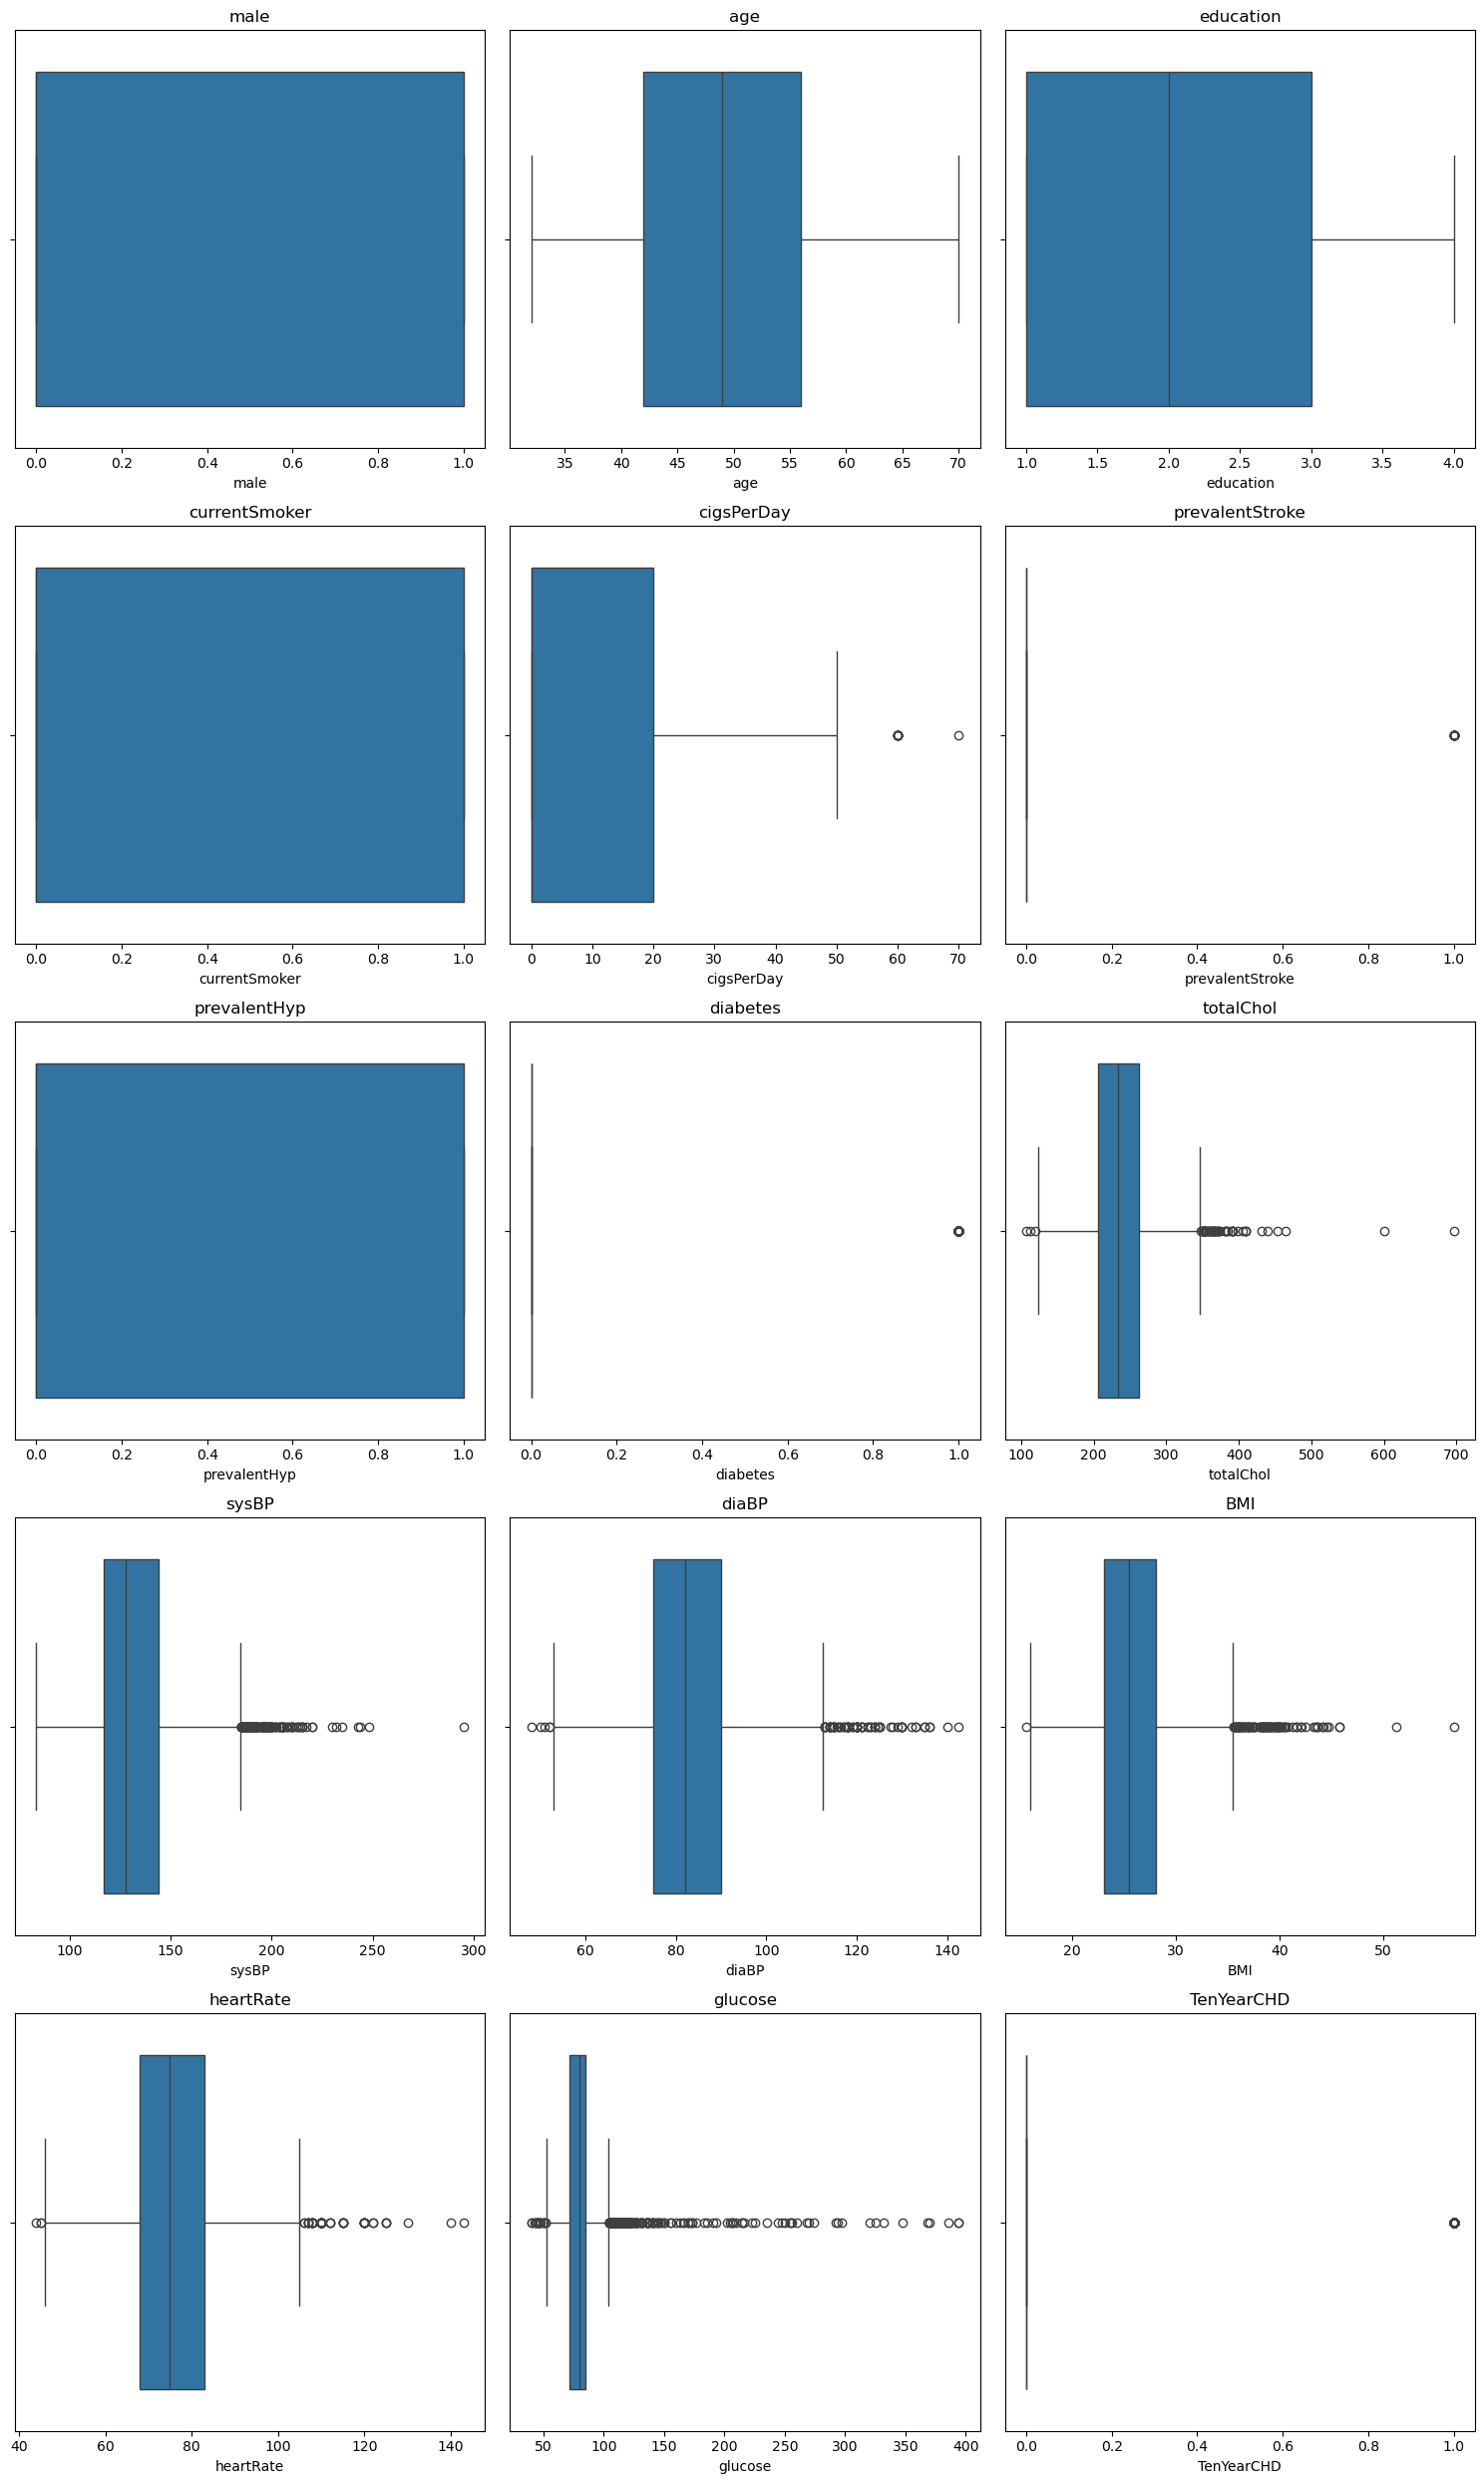

In [1034]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Define number of subplots dynamically
num_cols = len(numerical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensures enough rows
cols = min(3, num_cols)  # Up to 3 columns per row

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten in case of single row

# Create boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots (if columns < total axes)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()


In [1035]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from "Sales" column
df = remove_outliers_iqr(df, 'diaBP')

# Remove outliers from "CompPrice" column
df = remove_outliers_iqr(df, 'heartRate')

In [1036]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totalChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.49422,0.0,0,0.0,0.0,0.0,195.0,106.000000,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.00000,0.0,0,0.0,0.0,0.0,250.0,121.000000,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.00000,20.0,0,0.0,0.0,0.0,245.0,132.355744,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.00000,30.0,0,0.0,1.0,0.0,245.0,150.000000,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.00000,23.0,0,0.0,0.0,0.0,285.0,130.000000,84.0,23.10,85.0,85.0,0.0


In [1037]:
# 7- Checking for data imbalance in target column

In [1042]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totalChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000
mean,0.432638,49.489571,1.983770,0.495581,9.038814,0.006135,0.295951,0.024294,236.642897,131.127449,82.200613,25.714990,75.057884,81.695359,0.145767
std,0.495502,8.565757,1.008186,0.499980,11.894107,0.078095,0.456525,0.153981,44.250130,20.333152,10.757174,3.928667,10.831962,22.172917,0.352916
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,53.000000,15.540000,47.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,74.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,81.500000,25.380000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,1.000000,0.000000,262.000000,142.000000,89.000000,27.940000,82.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,235.000000,112.500000,51.280000,103.000000,394.000000,1.000000


In [1044]:
breaks = [65,75,80,96]
labels = ['Low', 'Medium', 'High']

# feature engineering

df['Health_Category'] = pd.cut(df['heartRate'], bins=breaks, labels=labels, right=False)

In [1046]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totalChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Health_Category
0,1.0,39.0,4.0,0.49422,0.0,0,0.0,0.0,0.0,195.0,106.000000,70.0,26.97,80.0,77.0,0.0,High
1,0.0,46.0,2.0,0.00000,0.0,0,0.0,0.0,0.0,250.0,121.000000,81.0,28.73,95.0,76.0,0.0,High
2,1.0,48.0,1.0,1.00000,20.0,0,0.0,0.0,0.0,245.0,132.355744,80.0,25.34,75.0,70.0,0.0,Medium
3,0.0,61.0,3.0,1.00000,30.0,0,0.0,1.0,0.0,245.0,150.000000,95.0,28.58,65.0,103.0,1.0,Low
4,0.0,46.0,3.0,1.00000,23.0,0,0.0,0.0,0.0,285.0,130.000000,84.0,23.10,85.0,85.0,0.0,High


In [1048]:
numerical_cols = ['heartRate']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [1050]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totalChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Health_Category
0,1.0,39.0,4.0,0.49422,0.0,0,0.0,0.0,0.0,195.0,106.000000,70.0,26.97,80.0,77.0,0.0,High
1,0.0,46.0,2.0,0.00000,0.0,0,0.0,0.0,0.0,250.0,121.000000,81.0,28.73,95.0,76.0,0.0,High
2,1.0,48.0,1.0,1.00000,20.0,0,0.0,0.0,0.0,245.0,132.355744,80.0,25.34,75.0,70.0,0.0,Medium
3,0.0,61.0,3.0,1.00000,30.0,0,0.0,1.0,0.0,245.0,150.000000,95.0,28.58,65.0,103.0,1.0,Low
4,0.0,46.0,3.0,1.00000,23.0,0,0.0,0.0,0.0,285.0,130.000000,84.0,23.10,85.0,85.0,0.0,High


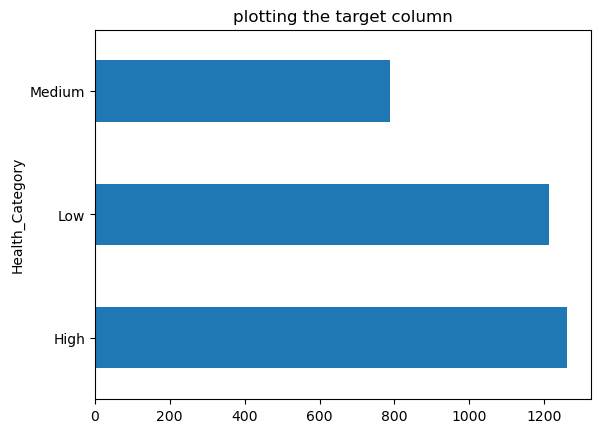

In [1052]:
df['Health_Category'].value_counts().plot(kind="barh")
plt.title("plotting the target column")
plt.show()

In [1054]:
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

print("Class distribution before undersampling:")
print(df['Health_Category'].value_counts())

Class distribution before undersampling:
Health_Category
High      1262
Low       1214
Medium     788
Name: count, dtype: int64


In [1056]:
df.dtypes

male                float64
age                 float64
education           float64
currentSmoker       float64
cigsPerDay          float64
BPMeds               object
prevalentStroke     float64
prevalentHyp        float64
diabetes            float64
totalChol           float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD          float64
Health_Category    category
dtype: object

In [1058]:
categorical_cols = ['Health_Category']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [1060]:
undersampler = RandomUnderSampler(random_state=42)

X=df.drop('Health_Category', axis=1)
y=df['Health_Category']

# Perform random undersampling
X_resampled, y_resampled = undersampler.fit_resample(X,y)

# Concatenate resampled features and target
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame({'Health_Category': y_resampled})], axis=1)

# Check the class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_resampled['Health_Category'].value_counts())


Class distribution after undersampling:
Health_Category
Low       788
Medium    788
High      788
Name: count, dtype: int64


In [1062]:
df_resampled.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totalChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Health_Category
3089,1.0,54.0,2.0,0.0,0.0,0,0.0,1.0,0.0,165.0,151.0,100.0,23.74,92.0,81.963655,0.0,High
2760,0.0,44.0,3.0,0.0,0.0,0,0.0,0.0,0.0,244.0,132.5,87.0,24.17,58.0,86.000000,0.0,High
3706,1.0,49.0,4.0,1.0,15.0,0,0.0,1.0,0.0,309.0,145.0,92.0,32.13,60.0,73.000000,0.0,High
1143,0.0,63.0,3.0,0.0,0.0,0,0.0,1.0,0.0,315.0,156.0,90.0,25.92,64.0,74.000000,0.0,High
1914,1.0,62.0,3.0,1.0,20.0,0,0.0,0.0,0.0,300.0,108.0,73.0,20.87,60.0,80.000000,0.0,High


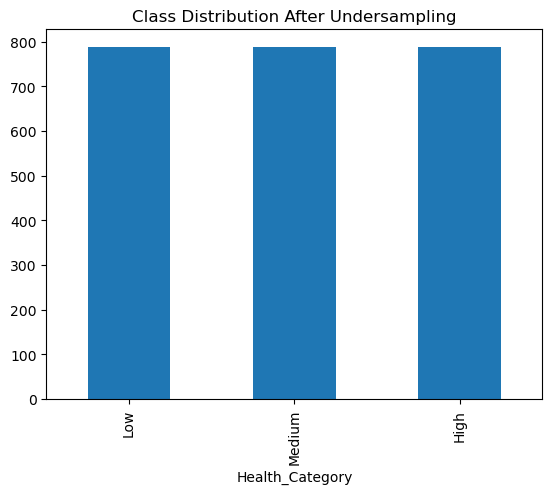

In [1064]:
df_resampled['Health_Category'].value_counts().plot(kind="bar")
plt.title("Class Distribution After Undersampling")
plt.show()


In [1066]:
# 8- Check for the Skewness (Right, left, normal, uniform)

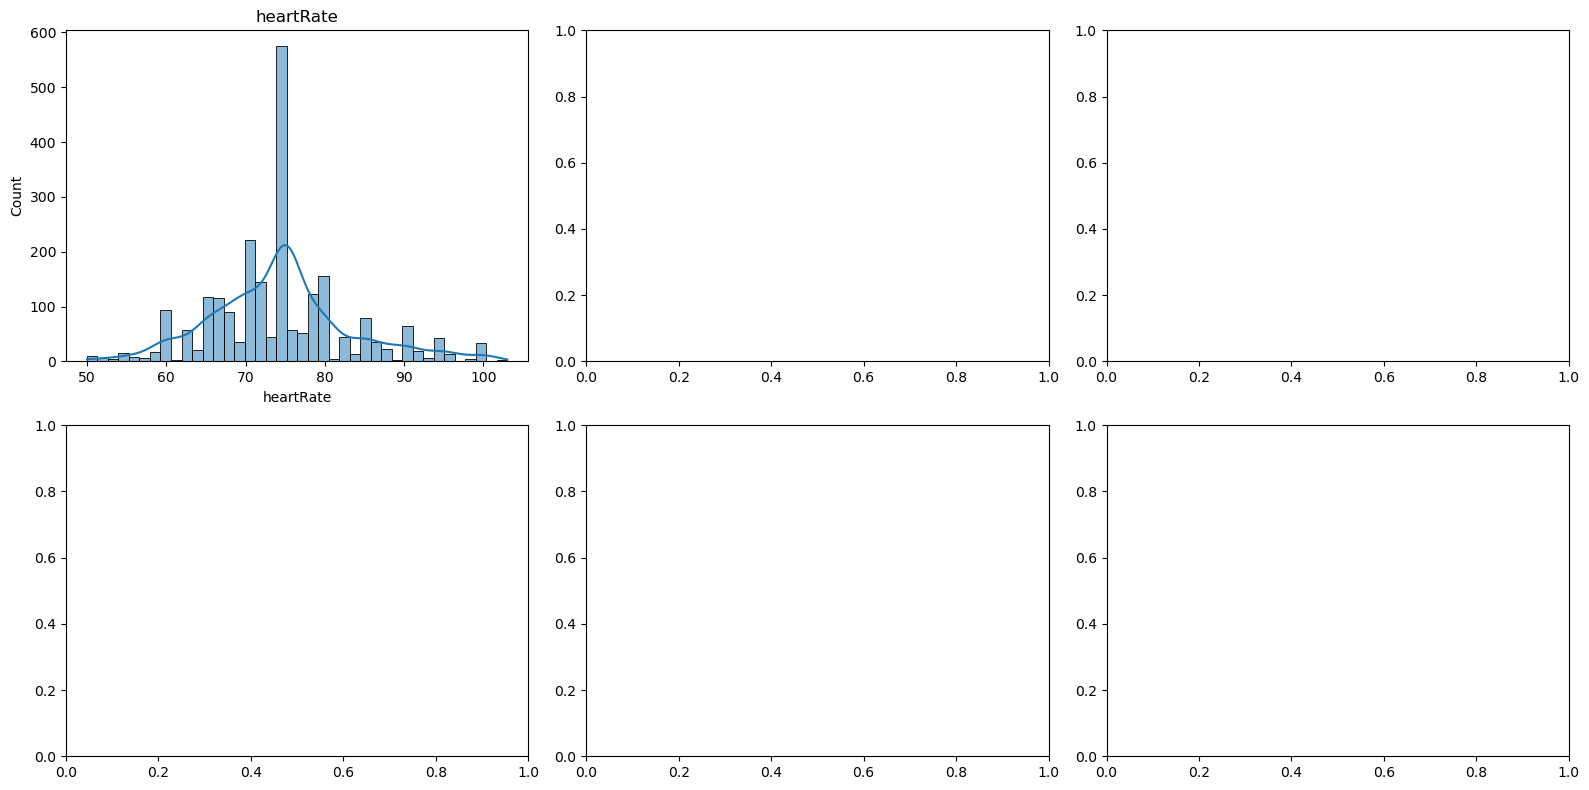

In [1068]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_resampled[col], ax=axes[i], kde=True) # kernel density estimate
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [1069]:
#9- Checking for multicollinearity

In [1072]:
num_df = df_resampled.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
correlation_matrix = num_df.corr()

correlation_matrix

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totalChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.036568,0.007716,0.214949,0.334838,0.003362,0.022764,0.021959,-0.079469,-0.016662,0.083357,0.098847,-0.064452,0.019867,0.089190
age,-0.036568,1.000000,-0.171014,-0.216795,-0.197734,0.052704,0.301978,0.125852,0.268475,0.410035,0.192915,0.108978,-0.016018,0.128555,0.219609
education,0.007716,-0.171014,1.000000,0.011219,0.005698,-0.029314,-0.081623,-0.046420,-0.020403,-0.126640,-0.056085,-0.116397,-0.019814,-0.041604,-0.060189
currentSmoker,0.214949,-0.216795,0.011219,1.000000,0.770941,-0.018474,-0.110613,-0.055236,-0.063989,-0.153488,-0.116797,-0.163004,0.041500,-0.051909,0.020416
cigsPerDay,0.334838,-0.197734,0.005698,0.770941,1.000000,-0.026695,-0.078124,-0.054068,-0.045360,-0.115177,-0.067716,-0.094031,0.036681,-0.058080,0.042380
prevalentStroke,0.003362,0.052704,-0.029314,-0.018474,-0.026695,1.000000,0.078476,-0.010650,-0.004954,0.055676,0.037384,0.016731,-0.016885,0.012226,0.078974
prevalentHyp,0.022764,0.301978,-0.081623,-0.110613,-0.078124,0.078476,1.000000,0.076187,0.165629,0.695986,0.600629,0.280891,0.113614,0.083593,0.169860
diabetes,0.021959,0.125852,-0.046420,-0.055236,-0.054068,-0.010650,0.076187,1.000000,0.055816,0.136502,0.040936,0.046037,0.041643,0.579402,0.048119
totalChol,-0.079469,0.268475,-0.020403,-0.063989,-0.045360,-0.004954,0.165629,0.055816,1.000000,0.231349,0.183080,0.149570,0.093591,0.054751,0.090066
sysBP,-0.016662,0.410035,-0.126640,-0.153488,-0.115177,0.055676,0.695986,0.136502,0.231349,1.000000,0.739085,0.283371,0.136355,0.146642,0.202700


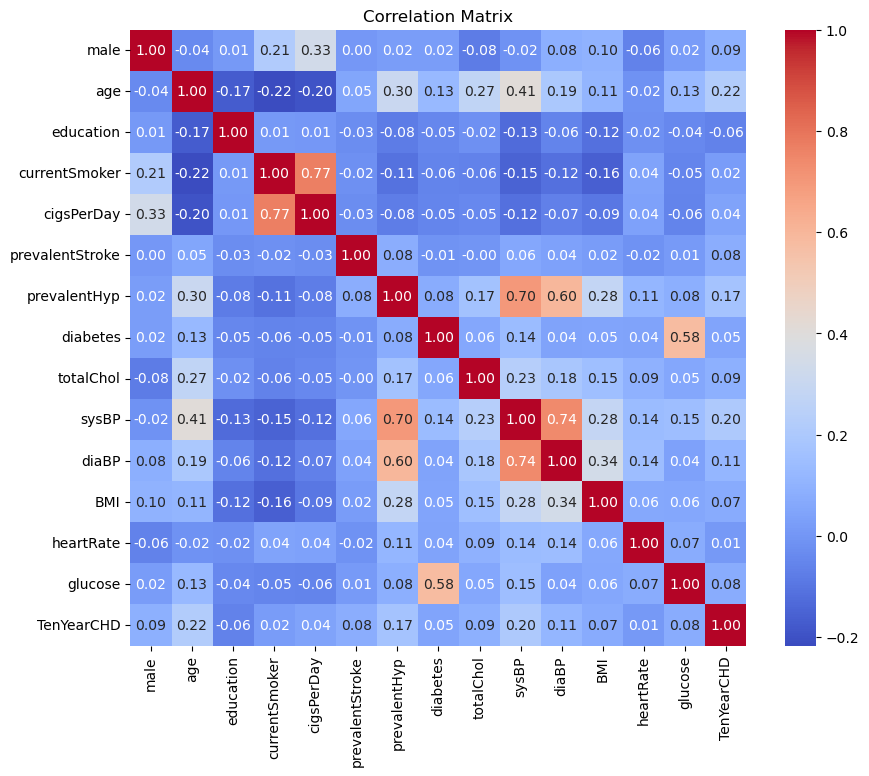

In [1074]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [1075]:
# Set the threshold
threshold = 0.7

# Find highly correlated column pairs
highly_correlated = np.where((correlation_matrix > threshold) & (correlation_matrix < 1))

# Print highly correlated column pairs
for i, j in zip(*highly_correlated):
    if i != j and i < j:  # Avoid printing duplicates and correlations of a variable with itself
        print(f"Columns '{num_df.columns[i]}' and '{num_df.columns[j]}' are highly correlated with correlation coefficient {correlation_matrix.iloc[i, j]}")

Columns 'currentSmoker' and 'cigsPerDay' are highly correlated with correlation coefficient 0.7709409180603312
Columns 'sysBP' and 'diaBP' are highly correlated with correlation coefficient 0.7390850895041374


In [1078]:
columns_to_drop = set()

# Iterate through highly correlated column pairs
for i, j in zip(*highly_correlated):
    if i != j and i < j:
        column_i = num_df.columns[i]
        column_j = num_df.columns[j]
        columns_to_drop.add(column_j)

# Drop the highly correlated columns from the DataFrame
df_resampled.drop(columns=columns_to_drop, inplace=True)

In [1080]:
#10- Cardinality

In [1087]:
df.age.nunique()

39

In [1089]:
df.to_csv('clean_data.csv', index=False)